In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


cuda


# V3

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


cuda
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (training) 0.48603:   6%|▌         | 126/2051 [00:36<09:17,  3.45it/s]


KeyboardInterrupt: 

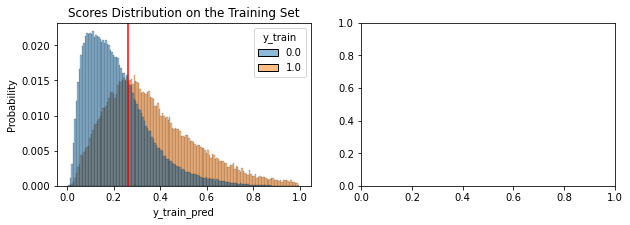

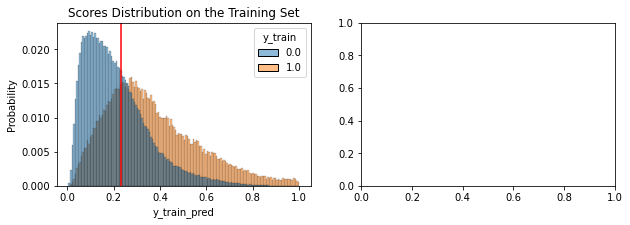

In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}

upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')




for seed_ in seeds:
    config = {
            # general
            'seed':123,
            'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
            'data_folder_path': './downstream_classification/data/individual-signals/',
            'targets': ['AF'],
            'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

            # training
            'batch_size': 128,
            'n_epochs': 10,
            'weight_decay': 0.3,
            'lr': 0.0005,
            'eval_metric':'rocauc',
            'patience':3,
            'clip':1,
            'loss_function_weight':None,

            # Experiment settings
            'upstream_model':upstream_model,
            'downstream_model':downstream_model,
            'impute_only_missing':True,
            'continue_training_upstream_model':True,
            'model_saving_path':'./combined_downstream_upstream/models/AF-V3',
            }

    best_rocauc_and_pr_auc_seed = trainer(**config)

    best_rocauc_and_pr_auc['roc-auc'].append(best_rocauc_and_pr_auc_seed['roc-auc'])
    best_rocauc_and_pr_auc['pr-auc'].append(best_rocauc_and_pr_auc_seed['auc-pr'])
    

# V4

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


cuda
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (validation) 0.49568: 100%|██████████| 416/416 [01:40<00:00,  4.15it/s]


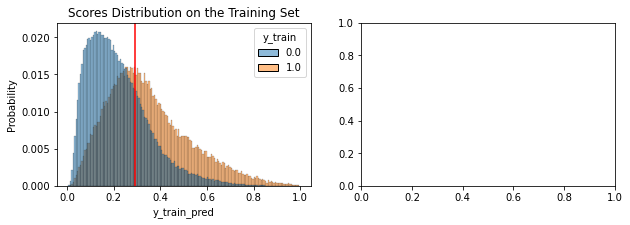

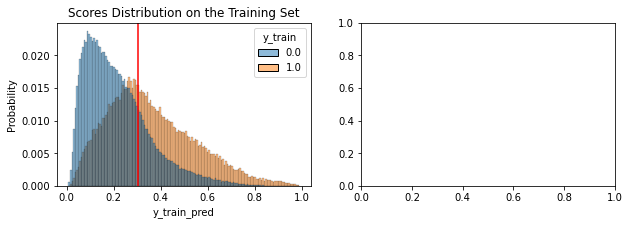

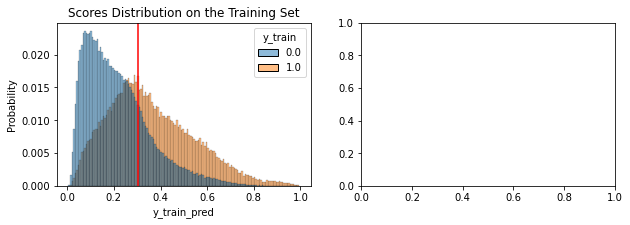

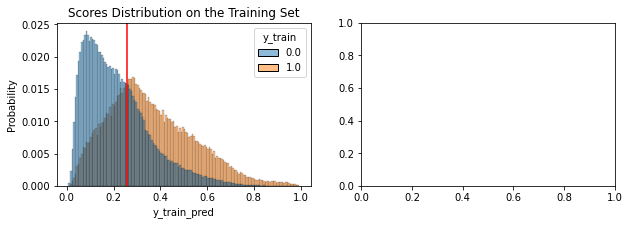

<Figure size 720x216 with 0 Axes>

In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

import numpy as np
import pickle 

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}
best_rocauc_and_pr_auc = {
    'roc-auc':[],
    'pr-auc':[]
}

seed = 123
np.random.seed(123)
seeds = np.random.randint(0,1000, 50)



for seed_ in seeds:

    upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
    downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



    config = {
            # general
            'seed':seed_,
            'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
            'data_folder_path': './downstream_classification/data/individual-signals/',
            'targets': ['AF'],
            'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

            # training
            'batch_size': 128,
            'n_epochs': 10,
            'weight_decay': 0.3,
            'lr': 0.0005,
            'eval_metric':'rocauc',
            'patience':3,
            'clip':1,
            'loss_function_weight':None,

            # Experiment settings
            'upstream_model':upstream_model,
            'downstream_model':downstream_model,
            'impute_only_missing':False,
            'continue_training_upstream_model':True,
            'model_saving_path':'./combined_downstream_upstream/models/AF-V4',
            }

    best_rocauc_and_pr_auc_seed = trainer(**config)

    best_rocauc_and_pr_auc['roc-auc'].append(best_rocauc_and_pr_auc_seed['roc-auc'])
    best_rocauc_and_pr_auc['pr-auc'].append(best_rocauc_and_pr_auc_seed['auc-pr'])
    
    with open(config['model_saving_path']+'/results_on_different_seeds.pkl', 'wb') as f:
        pickle.dump(best_rocauc_and_pr_auc, f)

